# Portfolio assignment 14: bivariate analysis on own dataset - categorical vs. categorical
Perform a bivariate analysis on at least 1 combination of 2 columns with categorical data in the dataset you already used in previous assignments that you chose.
For this bivariate analysis, at least perform the following tasks:
- Do you expect their to be a correlation between the two columns?
- Create a contigency table. Do you observe different ratios between categories here?
- Create a bar plot for this contigency table. Do you observe different ratios between categories here?
- Do a chi-squared test. What does the result say? What's teh chance of there being a correlation between the two columns?

In [1]:
import pandas as pd
import seaborn as sns
from scipy.stats import chi2_contingency
df = pd.read_csv('Datasets/aug_test.csv', sep=',')
df.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours
0,32403,city_41,8.270.000.000.000.000,Male,Has relevent experience,Full time course,Graduate,STEM,9,<10,NaN,1,21
1,9858,city_103,0.92,Female,Has relevent experience,no_enrollment,Graduate,STEM,5,NaN,Pvt Ltd,1,98
2,31806,city_21,624,Male,No relevent experience,no_enrollment,High School,NaN,<1,NaN,Pvt Ltd,never,15
3,27385,city_13,8.270.000.000.000.000,Male,Has relevent experience,no_enrollment,Masters,STEM,11,10/49,Pvt Ltd,1,39
4,27724,city_103,0.92,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,10000+,Pvt Ltd,>4,72


## Insight categorical data

### Gender

<AxesSubplot:>

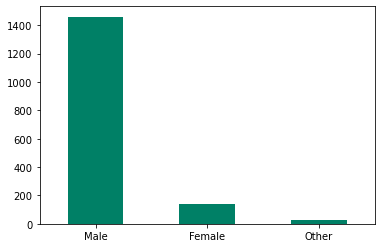

In [2]:
df.gender.value_counts().plot(kind='bar', colormap='summer', rot=0)

### Relevant experience

<AxesSubplot:>

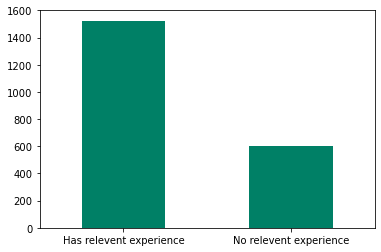

In [3]:
df.relevent_experience.value_counts().plot(kind='bar', colormap='summer', rot=0)

### Enrolled university

<AxesSubplot:>

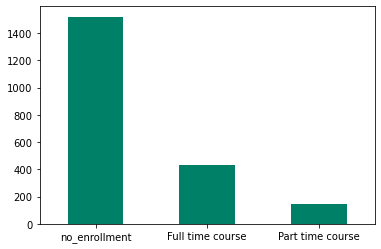

In [4]:
df.enrolled_university.value_counts().plot(kind='bar', colormap='summer', rot=0)

### Education level

<AxesSubplot:>

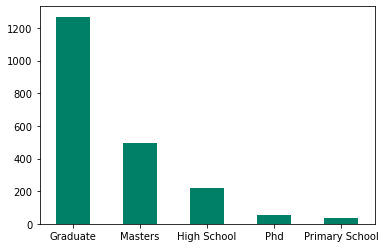

In [5]:
df.education_level.value_counts().plot(kind='bar', colormap='summer', rot=0)

## Bivariate analysis - categorical vs. categorical data

### Gender vs. Relevant experience

I expect their to be no correlation between the two columns because I think that men have more relevant experience because there are more men in the data scientist workfield.

In [6]:
contingencyTableGRE = df.groupby(['gender', 'relevent_experience']).size().unstack('gender', fill_value=0)
contingencyTableGRE

gender,Female,Male,Other
relevent_experience,,,
Has relevent experience,92,1110,13
No relevent experience,45,350,11


As you can see the ratio between the categories are different, there are more men with relevant experience. 76% of the men have relevant experience and 67,2% of the women have relevant experience.

<AxesSubplot:xlabel='relevent_experience'>

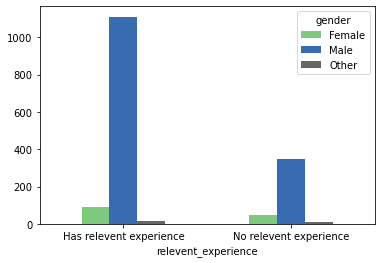

In [7]:
contingencyTableGRE.plot(kind='bar', colormap='Accent', rot=0)

In this barplot you can see that the ratio between the categories are different. The ratio between men and women with relevant experience is bigger than the ratio between men and women with no relevant experience.

In [8]:
chi2_contingency(contingencyTableGRE)

(10.86101811694569,
 0.004380865118435663,
 2,
 array([[ 102.6866132 , 1094.32449105,   17.98889574],
        [  34.3133868 ,  365.67550895,    6.01110426]]))

According to the chi-squared, there is even not 1% chance there is no correlation between men and women with and without relevant experience. As you can notice in the barplot there is a difference in ratio.

### Gender vs. Education level

I expect there to be a correlation between the gender and the education level because I think men and women are both capable of reaching the same level of education.

In [9]:
contingencyTableGEL = df.groupby(['gender', 'education_level']).size().unstack('gender', fill_value=0)
contingencyTableGEL

gender,Female,Male,Other
education_level,,,
Graduate,97,866,17
High School,6,158,4
Masters,26,356,1
Phd,7,36,0
Primary School,1,20,1


As you can observe that almost 24,8% of the men and 19% of the women have reached the education level of master. 

<AxesSubplot:xlabel='education_level'>

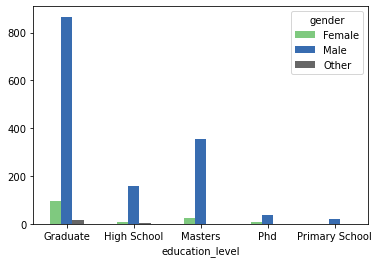

In [10]:
contingencyTableGEL.plot(kind='bar', colormap='Accent', rot=0)

As you can see there is a noticable ratio between the categories and the correspondence with the table is clearly visible.

In [11]:
chi2_contingency(contingencyTableGEL)

(20.275675352525525,
 0.009341908303287462,
 8,
 array([[8.41228070e+01, 8.81754386e+02, 1.41228070e+01],
        [1.44210526e+01, 1.51157895e+02, 2.42105263e+00],
        [3.28765664e+01, 3.44604010e+02, 5.51942356e+00],
        [3.69110276e+00, 3.86892231e+01, 6.19674185e-01],
        [1.88847118e+00, 1.97944862e+01, 3.17042607e-01]]))

According to the chi-squared test, there is not even 1% chance that there is a correlation between gender and education level. As you can notice in the barplot, there is a visible difference.

### Education level vs. Relevant experience

I expect that there wil be some correlation between the two columns because I think that people with a higher level of education have more experience and knowledge.

In [12]:
contingencyTableELRE = df.groupby(['education_level', 'relevent_experience']).size().unstack('education_level', fill_value=0)
contingencyTableELRE 

education_level,Graduate,High School,Masters,Phd,Primary School
relevent_experience,,,,,
Has relevent experience,970,94,393,30,7
No relevent experience,299,128,103,24,29


As you can see there is a difference in ratio. You can see there that people who are gratuated more than 75% has relevant experience, but form the people who have an education level of high school 42,3% have relevant experience, that is a lot less.

<AxesSubplot:xlabel='relevent_experience'>

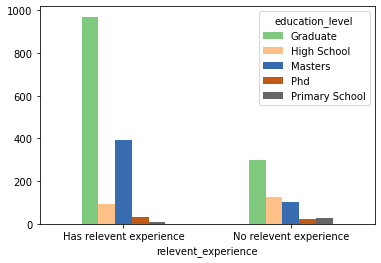

In [13]:
contingencyTableELRE.plot(kind='bar', colormap='Accent', rot=0)

As you can see there is a noticable ratio between the categories and the correspondence with the table is clearly visible.

In [14]:
chi2_contingency(contingencyTableELRE)

(178.42317230051634,
 1.6261579699551555e-37,
 4,
 array([[912.80019259, 159.6860857 , 356.7761194 ,  38.84256139,
          25.89504092],
        [356.19980741,  62.3139143 , 139.2238806 ,  15.15743861,
          10.10495908]]))

According to th chi-squared test, there is absolutely no chance that there is a correlation between the two columns.

### Relevant experience vs. Enrolled univeristy

I expect there to be no correlation between relevant experience and enrolled university

In [15]:
contingencyTableEURE = df.groupby(['enrolled_university', 'relevent_experience']).size().unstack('enrolled_university', fill_value=0)
contingencyTableEURE 

enrolled_university,Full time course,Part time course,no_enrollment
relevent_experience,,,
Has relevent experience,163,105,1239
No relevent experience,272,39,280


As you can see there is a noticeable ratio between the two columns.

<AxesSubplot:xlabel='relevent_experience'>

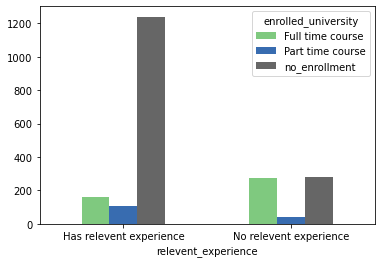

In [16]:
contingencyTableEURE.plot(kind='bar', colormap='Accent', rot=0)

In this barplot you can see that there is a visible difference in ratio.

In [17]:
chi2_contingency(contingencyTableEURE)

(325.04452314064486,
 2.6150416696716645e-71,
 2,
 array([[ 312.46186845,  103.435653  , 1091.10247855],
        [ 122.53813155,   40.564347  ,  427.89752145]]))

According to th chi-squared test, there is absolutely no chance that there is a correlation between relevant experience and enrolled university.